In [25]:
# load the baseline results
# read in baseline data
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

baseline_csv = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/baseline_runs/clip_hba_behavior_seed1/training_results/training_res_seed1.csv')

if baseline_csv.exists():
    baseline_df = pd.read_csv(baseline_csv)
    print(f"Baseline data loaded: {len(baseline_df)} epochs")
else:
    print("Warning: Baseline data not found")
    
print(baseline_df.head())

Baseline data loaded: 118 epochs
   epoch  train_loss   test_loss  behavioral_rsa_rho  behavioral_rsa_p_value
0      1  143.198375  114.267337            0.455443            7.497325e-59
1      2   99.003030   91.310430            0.422459            4.797240e-50
2      3   88.155927   84.871568            0.421268            9.572966e-50
3      4   82.863315   80.375895            0.425018            1.076738e-50
4      5   78.583811   76.447118            0.440511            9.591843e-55


In [26]:
# Find the epoch with minimum test loss
baseline_min_test_loss_idx = baseline_df['test_loss'].idxmin()

# Keep all rows up to and including the minimum test loss epoch
baseline_filtered_df = baseline_df.loc[:baseline_min_test_loss_idx].copy()

# replace the baseline data in all_data with the baseline_filtered_df
baseline_df = baseline_filtered_df

print(baseline_df)

    epoch  train_loss   test_loss  behavioral_rsa_rho  behavioral_rsa_p_value
0       1  143.198375  114.267337            0.455443            7.497325e-59
1       2   99.003030   91.310430            0.422459            4.797240e-50
2       3   88.155927   84.871568            0.421268            9.572966e-50
3       4   82.863315   80.375895            0.425018            1.076738e-50
4       5   78.583811   76.447118            0.440511            9.591843e-55
..    ...         ...         ...                 ...                     ...
93     94   17.675313   29.133197            0.755533           4.658267e-209
94     95   17.545072   29.212518            0.759054           4.063549e-212
95     96   17.450050   29.148153            0.755926           2.132139e-209
96     97   17.317206   29.184973            0.757532           8.660125e-211
97     98   17.214430   29.101309            0.755587           4.177484e-209

[98 rows x 5 columns]


In [27]:
# get all of the training run results from the perturbation length experiments

# path to base directory of the perturbation length experiments
perturb_length_base_dir = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/dgx_length_experiments/perturb_length_experiments_baselineseed1_perturbseed0')

# list all training run directories in the results_dir
run_dirs = sorted([d for d in perturb_length_base_dir.iterdir() 
                  if d.is_dir()
                  and d.name.startswith('random_target')])

for run_dir in run_dirs:
    print(run_dir.name)

random_target_e10_l10
random_target_e10_l2
random_target_e10_l20
random_target_e10_l30
random_target_e10_l40
random_target_e10_l5
random_target_e10_l50
random_target_e13_l10
random_target_e13_l20
random_target_e13_l30
random_target_e13_l40
random_target_e13_l5
random_target_e13_l50
random_target_e16_l10
random_target_e16_l20
random_target_e16_l30
random_target_e16_l40
random_target_e16_l5
random_target_e16_l50
random_target_e19_l10
random_target_e19_l20
random_target_e19_l30
random_target_e19_l40
random_target_e19_l5
random_target_e19_l50
random_target_e1_l10
random_target_e1_l2
random_target_e1_l20
random_target_e1_l30
random_target_e1_l40
random_target_e1_l5
random_target_e1_l50
random_target_e20_l10
random_target_e20_l2
random_target_e20_l20
random_target_e20_l30
random_target_e20_l40
random_target_e20_l5
random_target_e20_l50
random_target_e22_l5
random_target_e2_l10
random_target_e2_l2
random_target_e2_l20
random_target_e2_l30
random_target_e2_l40
random_target_e2_l5
random_target

In [28]:
# in every run_dir, find the folder called either metrics.csv or training_res.csv
# and read it in as a pandas dataframe

#all_perturb_length_dfs should be a dict mapping run names (strings) to DataFrames, or a list of DataFrames, where each DataFrame has a 'test_loss' column and its indices represent epochs. 

all_perturb_length_dfs = {}

for run_dir in run_dirs:
    if 'metrics.csv' in os.listdir(run_dir):
        print(f'Found results csv in {run_dir.name}')
        df = pd.read_csv(run_dir / 'metrics.csv')
        all_perturb_length_dfs[run_dir.name] = df
    elif 'training_res.csv' in os.listdir(run_dir):
        print(f'Found results csv in {run_dir.name}')
        df = pd.read_csv(run_dir / 'training_res.csv')
        all_perturb_length_dfs[run_dir.name] = df

Found results csv in random_target_e10_l10
Found results csv in random_target_e10_l2
Found results csv in random_target_e10_l20
Found results csv in random_target_e10_l30
Found results csv in random_target_e10_l40
Found results csv in random_target_e10_l5
Found results csv in random_target_e10_l50
Found results csv in random_target_e13_l10
Found results csv in random_target_e13_l20
Found results csv in random_target_e13_l30
Found results csv in random_target_e13_l40
Found results csv in random_target_e13_l5
Found results csv in random_target_e13_l50
Found results csv in random_target_e16_l10
Found results csv in random_target_e16_l20
Found results csv in random_target_e16_l30
Found results csv in random_target_e16_l40
Found results csv in random_target_e16_l5
Found results csv in random_target_e16_l50
Found results csv in random_target_e19_l10
Found results csv in random_target_e19_l20
Found results csv in random_target_e19_l30
Found results csv in random_target_e19_l40
Found results c

In [29]:
print(all_perturb_length_dfs)

{'random_target_e10_l10':      epoch  train_loss  test_loss  behavioral_rsa_rho  behavioral_rsa_p_value  \
0       10  116.037356  83.877477            0.627783           1.161130e-124   
1       11  108.866402  87.170436            0.620361           6.029206e-121   
2       12  106.712804  90.209957            0.620820           3.575812e-121   
3       13  105.615242  92.952512            0.619597           1.434417e-120   
4       14  104.945687  95.128610            0.619060           2.637457e-120   
..     ...         ...        ...                 ...                     ...   
104    114   14.820902  29.497532            0.730804           5.946660e-189   
105    115   14.732647  29.561627            0.734103           1.669248e-191   
106    116   14.660842  29.512901            0.734373           1.028537e-191   
107    117   14.560640  29.578890            0.734255           1.272555e-191   
108    118   14.474779  29.601395            0.732563           2.619055e-190   

 

In [30]:
# filter out the rows that were from before early stopping kicked in (but after the minimum test loss was achieved)

all_perturb_length_data = {}

for run_name, df in all_perturb_length_dfs.items():
    if len(df) == 0:
        all_perturb_length_data[run_name] = df
        continue

    # Find the epoch with minimum test loss
    min_test_loss_idx = df['test_loss'].idxmin()

    # Keep all rows up to and including the minimum test loss epoch
    filtered_df = df.loc[:min_test_loss_idx].copy()

    all_perturb_length_data[run_name] = filtered_df

    # Print info about the filtering
    original_epochs = len(df)
    filtered_epochs = len(filtered_df)
    removed_epochs = original_epochs - filtered_epochs
    print(f"{run_name}: {original_epochs} -> {filtered_epochs} epochs "
            f"(removed {removed_epochs} epochs after minimum test loss)")

random_target_e10_l10: 109 -> 89 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l2: 95 -> 75 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l20: 109 -> 89 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l30: 119 -> 99 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l40: 127 -> 107 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l5: 97 -> 77 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l50: 136 -> 116 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l10: 106 -> 86 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l20: 106 -> 86 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l30: 124 -> 104 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l40: 124 -> 104 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l5: 106 -> 86 epochs (removed 20 epochs after minimum test

In [31]:

# First, let's examine the actual run names to understand the format
print("Actual run names:")
for run_name, df in all_perturb_length_dfs.items():
    print(f"  {run_name}")

print("\nParsing run names...")

# Extract metadata for each run
run_metadata = []
for run_name, df in all_perturb_length_dfs.items():
    # Parse run name - format appears to be "random_target_e{epoch}_l{length}"
    # Let's handle this more carefully
    if 'random_target_e' in run_name:
        # Extract epoch and length from format like "random_target_e70_l20"
        parts = run_name.split('_')
        start_epoch = None
        length = None
        
        for part in parts:
            if part.startswith('e') and part[1:].isdigit():
                start_epoch = int(part[1:])
            elif part.startswith('l') and part[1:].isdigit():
                length = int(part[1:])
        
        if start_epoch is not None and length is not None:
            run_metadata.append({
                'run_name': run_name,
                'start_epoch': start_epoch,
                'length': length,
                'df': df
            })
            
            print(f"Run: {run_name}")
            print(f"  Start epoch: {start_epoch}")
            print(f"  Length: {length} epochs")
            print(f"  Total epochs: {len(df)}")
            print()
        else:
            print(f"Warning: Could not parse run name: {run_name}")
    else:
        print(f"Warning: Unexpected run name format: {run_name}")

print(f"Total runs parsed: {len(run_metadata)}")


Actual run names:
  random_target_e10_l10
  random_target_e10_l2
  random_target_e10_l20
  random_target_e10_l30
  random_target_e10_l40
  random_target_e10_l5
  random_target_e10_l50
  random_target_e13_l10
  random_target_e13_l20
  random_target_e13_l30
  random_target_e13_l40
  random_target_e13_l5
  random_target_e13_l50
  random_target_e16_l10
  random_target_e16_l20
  random_target_e16_l30
  random_target_e16_l40
  random_target_e16_l5
  random_target_e16_l50
  random_target_e19_l10
  random_target_e19_l20
  random_target_e19_l30
  random_target_e19_l40
  random_target_e19_l5
  random_target_e19_l50
  random_target_e1_l10
  random_target_e1_l2
  random_target_e1_l20
  random_target_e1_l30
  random_target_e1_l40
  random_target_e1_l5
  random_target_e1_l50
  random_target_e20_l10
  random_target_e20_l2
  random_target_e20_l20
  random_target_e20_l30
  random_target_e20_l40
  random_target_e20_l5
  random_target_e20_l50
  random_target_e22_l5
  random_target_e2_l10
  random_target_


Summary Statistics:
  Baseline minimum test loss (epoch 98): 29.1013
  Total runs: 98
  Mean deviation: 0.1459
  Standard deviation: 0.0733
  Min deviation: 0.0183
  Max deviation: 0.3354
  Runs better than baseline minimum (negative deviation): 0
  Runs worse than baseline minimum (positive deviation): 98


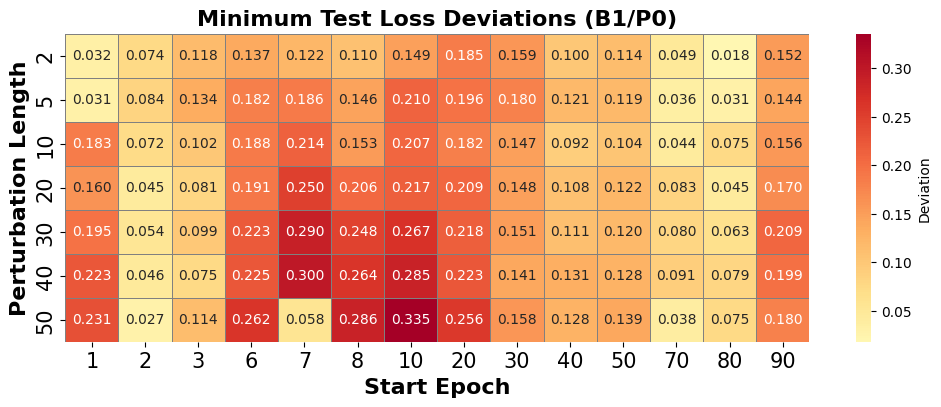

In [32]:
# show the deviation from baseline minimum test loss in a heatmap, with starting epoch on the x-axis and perturbation length on the y-axis
# the color of the cell shows the deviation from baseline minimum test loss
# the heatmap is sorted by starting epoch on the x-axis, then by perturbation length on the y-axis

import seaborn as sns

# Get minimum test loss from baseline run
baseline_min_test_loss = baseline_df['test_loss'].min()
baseline_min_epoch = baseline_df.loc[baseline_df['test_loss'].idxmin(), 'epoch']

# Collect minimum test loss deviations
deviation_data = []

for run_info in run_metadata:
    run_name = run_info['run_name']
    df = run_info['df']
    start_epoch = run_info['start_epoch']
    length = run_info['length']
    
    # Sort by epoch
    df_sorted = df.sort_values('epoch')
    
    if len(df_sorted) == 0:
        continue
    
    # Get minimum test loss value reached in this run
    min_test_loss = df_sorted['test_loss'].min()
    min_test_loss_epoch = df_sorted.loc[df_sorted['test_loss'].idxmin(), 'epoch']
    
    # Calculate deviation from baseline minimum
    # (positive = worse than baseline, negative = better)
    deviation = min_test_loss - baseline_min_test_loss

    deviation_data.append({
        'start_epoch': start_epoch,
        'length': length,
        'deviation': deviation,
        'min_test_loss': min_test_loss,
        'min_test_loss_epoch': min_test_loss_epoch,
        'baseline_min_test_loss': baseline_min_test_loss
    })

# Convert to DataFrame
deviation_df = pd.DataFrame(deviation_data)

# Exclude any rows you want to exclude
deviation_df = deviation_df[deviation_df['start_epoch'] != 13]
deviation_df = deviation_df[deviation_df['start_epoch'] != 16]
deviation_df = deviation_df[deviation_df['start_epoch'] != 19]
deviation_df = deviation_df[deviation_df['start_epoch'] != 22]
deviation_df = deviation_df[deviation_df['start_epoch'] != 60]
deviation_df = deviation_df[deviation_df['start_epoch'] != 58]
deviation_df = deviation_df[deviation_df['start_epoch'] != 94]

# Create pivot table for heatmap: rows (y-axis) = length, columns (x-axis) = start_epoch
heatmap_data = deviation_df.pivot_table(
    values='deviation',
    index='length',
    columns='start_epoch',
    aggfunc='first'  # Should only be one value per combination, but use first to be safe
)

# Sort by start_epoch (columns) and length (rows)
heatmap_data = heatmap_data.sort_index(axis=0)  # Sort rows (length)
heatmap_data = heatmap_data.sort_index(axis=1)  # Sort columns (start_epoch)

# Create the heatmap with smaller figure size
plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.3f', 
    cmap='RdYlGn_r',  # Reversed Red-Yellow-Green colormap (green=better/lower, red=worse/higher)
    center=0,  # Center colormap at 0 (no deviation)
    cbar_kws={'label': 'Deviation'},
    linewidths=0.5,
    linecolor='gray'
)
ax.set_xlabel('Start Epoch', fontsize=16, fontweight='bold')
ax.set_ylabel('Perturbation Length', fontsize=16, fontweight='bold')
ax.set_title('Minimum Test Loss Deviations (B1/P0)', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Print summary statistics
print(f"\nSummary Statistics:")
print(f"  Baseline minimum test loss (epoch {baseline_min_epoch}): {baseline_min_test_loss:.4f}")
print(f"  Total runs: {len(deviation_df)}")
print(f"  Mean deviation: {deviation_df['deviation'].mean():.4f}")
print(f"  Standard deviation: {deviation_df['deviation'].std():.4f}")
print(f"  Min deviation: {deviation_df['deviation'].min():.4f}")
print(f"  Max deviation: {deviation_df['deviation'].max():.4f}")
print(f"  Runs better than baseline minimum (negative deviation): {len(deviation_df[deviation_df['deviation'] < 0])}")
print(f"  Runs worse than baseline minimum (positive deviation): {len(deviation_df[deviation_df['deviation'] > 0])}")

### Baseline Seed 2 - Perturbation Seed 1

In [33]:
# load the baseline results
# read in baseline data
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

baseline_csv = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/baseline_runs/clip_hba_behavior_seed2/training_results/training_res_seed2.csv')

if baseline_csv.exists():
    baseline_df = pd.read_csv(baseline_csv)
    print(f"Baseline data loaded: {len(baseline_df)} epochs")
else:
    print("Warning: Baseline data not found")
    
# Find the epoch with minimum test loss
baseline_min_test_loss_idx = baseline_df['test_loss'].idxmin()

# Keep all rows up to and including the minimum test loss epoch
baseline_filtered_df = baseline_df.loc[:baseline_min_test_loss_idx].copy()

# replace the baseline data in all_data with the baseline_filtered_df
baseline_df = baseline_filtered_df

# get all of the training run results from the perturbation length experiments

# path to base directory of the perturbation length experiments
perturb_length_base_dir = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/dgx_length_experiments/perturb_length_experiments_baselineseed2_perturbseed1')

# list all training run directories in the results_dir
run_dirs = sorted([d for d in perturb_length_base_dir.iterdir() 
                  if d.is_dir()
                  and d.name.startswith('random_target')])

for run_dir in run_dirs:
    print(run_dir.name)

# in every run_dir, find the folder called either metrics.csv or training_res.csv
# and read it in as a pandas dataframe

#all_perturb_length_dfs should be a dict mapping run names (strings) to DataFrames, or a list of DataFrames, where each DataFrame has a 'test_loss' column and its indices represent epochs. 

all_perturb_length_dfs = {}

for run_dir in run_dirs:
    if 'metrics.csv' in os.listdir(run_dir):
        print(f'Found results csv in {run_dir.name}')
        df = pd.read_csv(run_dir / 'metrics.csv')
        all_perturb_length_dfs[run_dir.name] = df
    elif 'training_res.csv' in os.listdir(run_dir):
        print(f'Found results csv in {run_dir.name}')
        df = pd.read_csv(run_dir / 'training_res.csv')
        all_perturb_length_dfs[run_dir.name] = df


# First, let's examine the actual run names to understand the format
print("Actual run names:")
for run_name, df in all_perturb_length_dfs.items():
    print(f"  {run_name}")

print("\nParsing run names...")

# Extract metadata for each run
run_metadata = []
for run_name, df in all_perturb_length_dfs.items():
    # Parse run name - format appears to be "random_target_e{epoch}_l{length}"
    # Let's handle this more carefully
    if 'random_target_e' in run_name:
        # Extract epoch and length from format like "random_target_e70_l20"
        parts = run_name.split('_')
        start_epoch = None
        length = None
        
        for part in parts:
            if part.startswith('e') and part[1:].isdigit():
                start_epoch = int(part[1:])
            elif part.startswith('l') and part[1:].isdigit():
                length = int(part[1:])
        
        if start_epoch is not None and length is not None:
            run_metadata.append({
                'run_name': run_name,
                'start_epoch': start_epoch,
                'length': length,
                'df': df
            })
            
            print(f"Run: {run_name}")
            print(f"  Start epoch: {start_epoch}")
            print(f"  Length: {length} epochs")
            print(f"  Total epochs: {len(df)}")
            print()
        else:
            print(f"Warning: Could not parse run name: {run_name}")
    else:
        print(f"Warning: Unexpected run name format: {run_name}")

print(f"Total runs parsed: {len(run_metadata)}")



Baseline data loaded: 112 epochs
random_target_e10_l10
random_target_e10_l20
random_target_e10_l30
random_target_e10_l40
random_target_e10_l5
random_target_e10_l50
random_target_e20_l10
random_target_e20_l20
random_target_e20_l30
random_target_e20_l40
random_target_e20_l5
random_target_e20_l50
random_target_e2_l10
random_target_e2_l20
random_target_e2_l30
random_target_e2_l40
random_target_e2_l5
random_target_e2_l50
random_target_e30_l10
random_target_e30_l20
random_target_e30_l30
random_target_e30_l40
random_target_e30_l5
random_target_e30_l50
random_target_e3_l10
random_target_e3_l20
random_target_e3_l30
random_target_e3_l40
random_target_e3_l5
random_target_e3_l50
random_target_e40_l10
random_target_e40_l20
random_target_e40_l30
random_target_e40_l40
random_target_e40_l5
random_target_e40_l50
random_target_e4_l10
random_target_e4_l20
random_target_e4_l30
random_target_e4_l40
random_target_e4_l5
random_target_e4_l50
random_target_e50_l10
random_target_e50_l20
random_target_e50_l30
ra


Summary Statistics:
  Baseline minimum test loss (epoch 92): 30.2443
  Total runs: 96
  Mean deviation: 0.0464
  Standard deviation: 0.2280
  Min deviation: -0.0722
  Max deviation: 1.9674
  Runs better than baseline minimum (negative deviation): 30
  Runs worse than baseline minimum (positive deviation): 66


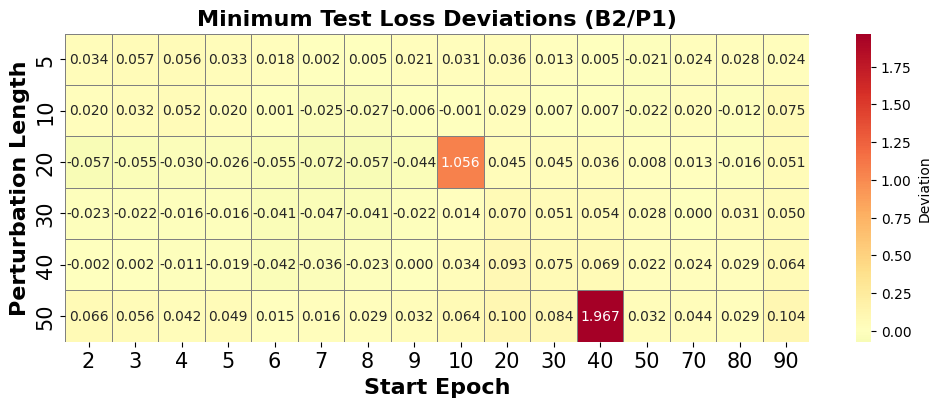

In [34]:
# show the deviation from baseline minimum test loss in a heatmap, with starting epoch on the x-axis and perturbation length on the y-axis
# the color of the cell shows the deviation from baseline minimum test loss
# the heatmap is sorted by starting epoch on the x-axis, then by perturbation length on the y-axis

import seaborn as sns

# Get minimum test loss from baseline run
baseline_min_test_loss = baseline_df['test_loss'].min()
baseline_min_epoch = baseline_df.loc[baseline_df['test_loss'].idxmin(), 'epoch']

# Collect minimum test loss deviations
deviation_data = []

for run_info in run_metadata:
    run_name = run_info['run_name']
    df = run_info['df']
    start_epoch = run_info['start_epoch']
    length = run_info['length']
    
    # Sort by epoch
    df_sorted = df.sort_values('epoch')
    
    if len(df_sorted) == 0:
        continue
    
    # Get minimum test loss value reached in this run
    min_test_loss = df_sorted['test_loss'].min()
    min_test_loss_epoch = df_sorted.loc[df_sorted['test_loss'].idxmin(), 'epoch']
    
    # Calculate deviation from baseline minimum
    # (positive = worse than baseline, negative = better)
    deviation = min_test_loss - baseline_min_test_loss

    deviation_data.append({
        'start_epoch': start_epoch,
        'length': length,
        'deviation': deviation,
        'min_test_loss': min_test_loss,
        'min_test_loss_epoch': min_test_loss_epoch,
        'baseline_min_test_loss': baseline_min_test_loss
    })

# Convert to DataFrame
deviation_df = pd.DataFrame(deviation_data)

# Exclude any rows you want to exclude
deviation_df = deviation_df[deviation_df['start_epoch'] != 13]
deviation_df = deviation_df[deviation_df['start_epoch'] != 16]
deviation_df = deviation_df[deviation_df['start_epoch'] != 19]
deviation_df = deviation_df[deviation_df['start_epoch'] != 22]
deviation_df = deviation_df[deviation_df['start_epoch'] != 60]
deviation_df = deviation_df[deviation_df['start_epoch'] != 58]
deviation_df = deviation_df[deviation_df['start_epoch'] != 94]

# Create pivot table for heatmap: rows (y-axis) = length, columns (x-axis) = start_epoch
heatmap_data = deviation_df.pivot_table(
    values='deviation',
    index='length',
    columns='start_epoch',
    aggfunc='first'  # Should only be one value per combination, but use first to be safe
)

# Sort by start_epoch (columns) and length (rows)
heatmap_data = heatmap_data.sort_index(axis=0)  # Sort rows (length)
heatmap_data = heatmap_data.sort_index(axis=1)  # Sort columns (start_epoch)

# Create the heatmap with smaller figure size
plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.3f', 
    cmap='RdYlGn_r',  # Reversed Red-Yellow-Green colormap (green=better/lower, red=worse/higher)
    center=0,  # Center colormap at 0 (no deviation)
    cbar_kws={'label': 'Deviation'},
    linewidths=0.5,
    linecolor='gray'
)
ax.set_xlabel('Start Epoch', fontsize=16, fontweight='bold')
ax.set_ylabel('Perturbation Length', fontsize=16, fontweight='bold')
ax.set_title('Minimum Test Loss Deviations (B2/P1)', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Print summary statistics
print(f"\nSummary Statistics:")
print(f"  Baseline minimum test loss (epoch {baseline_min_epoch}): {baseline_min_test_loss:.4f}")
print(f"  Total runs: {len(deviation_df)}")
print(f"  Mean deviation: {deviation_df['deviation'].mean():.4f}")
print(f"  Standard deviation: {deviation_df['deviation'].std():.4f}")
print(f"  Min deviation: {deviation_df['deviation'].min():.4f}")
print(f"  Max deviation: {deviation_df['deviation'].max():.4f}")
print(f"  Runs better than baseline minimum (negative deviation): {len(deviation_df[deviation_df['deviation'] < 0])}")
print(f"  Runs worse than baseline minimum (positive deviation): {len(deviation_df[deviation_df['deviation'] > 0])}")

### Baseline Seed 3 - Perturbation Seed 2

In [35]:
# load the baseline results
# read in baseline data
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

baseline_csv = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/baseline_runs/clip_hba_behavior_seed3/training_results/training_res_seed3.csv')

if baseline_csv.exists():
    baseline_df = pd.read_csv(baseline_csv)
    print(f"Baseline data loaded: {len(baseline_df)} epochs")
else:
    print("Warning: Baseline data not found")
    
# Find the epoch with minimum test loss
baseline_min_test_loss_idx = baseline_df['test_loss'].idxmin()

# Keep all rows up to and including the minimum test loss epoch
baseline_filtered_df = baseline_df.loc[:baseline_min_test_loss_idx].copy()

# replace the baseline data in all_data with the baseline_filtered_df
baseline_df = baseline_filtered_df

# get all of the training run results from the perturbation length experiments

# path to base directory of the perturbation length experiments
perturb_length_base_dir = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/dgx_length_experiments/perturb_length_experiments_baselineseed3_perturbseed2')

# list all training run directories in the results_dir
run_dirs = sorted([d for d in perturb_length_base_dir.iterdir() 
                  if d.is_dir()
                  and d.name.startswith('random_target')])

for run_dir in run_dirs:
    print(run_dir.name)

# in every run_dir, find the folder called either metrics.csv or training_res.csv
# and read it in as a pandas dataframe

#all_perturb_length_dfs should be a dict mapping run names (strings) to DataFrames, or a list of DataFrames, where each DataFrame has a 'test_loss' column and its indices represent epochs. 

all_perturb_length_dfs = {}

for run_dir in run_dirs:
    if 'metrics.csv' in os.listdir(run_dir):
        print(f'Found results csv in {run_dir.name}')
        df = pd.read_csv(run_dir / 'metrics.csv')
        all_perturb_length_dfs[run_dir.name] = df
    elif 'training_res.csv' in os.listdir(run_dir):
        print(f'Found results csv in {run_dir.name}')
        df = pd.read_csv(run_dir / 'training_res.csv')
        all_perturb_length_dfs[run_dir.name] = df


# First, let's examine the actual run names to understand the format
print("Actual run names:")
for run_name, df in all_perturb_length_dfs.items():
    print(f"  {run_name}")

print("\nParsing run names...")

# Extract metadata for each run
run_metadata = []
for run_name, df in all_perturb_length_dfs.items():
    # Parse run name - format appears to be "random_target_e{epoch}_l{length}"
    # Let's handle this more carefully
    if 'random_target_e' in run_name:
        # Extract epoch and length from format like "random_target_e70_l20"
        parts = run_name.split('_')
        start_epoch = None
        length = None
        
        for part in parts:
            if part.startswith('e') and part[1:].isdigit():
                start_epoch = int(part[1:])
            elif part.startswith('l') and part[1:].isdigit():
                length = int(part[1:])
        
        if start_epoch is not None and length is not None:
            run_metadata.append({
                'run_name': run_name,
                'start_epoch': start_epoch,
                'length': length,
                'df': df
            })
            
            print(f"Run: {run_name}")
            print(f"  Start epoch: {start_epoch}")
            print(f"  Length: {length} epochs")
            print(f"  Total epochs: {len(df)}")
            print()
        else:
            print(f"Warning: Could not parse run name: {run_name}")
    else:
        print(f"Warning: Unexpected run name format: {run_name}")

print(f"Total runs parsed: {len(run_metadata)}")



Baseline data loaded: 123 epochs
random_target_e10_l10
random_target_e10_l20
random_target_e10_l30
random_target_e10_l40
random_target_e10_l5
random_target_e10_l50
random_target_e20_l10
random_target_e20_l20
random_target_e20_l30
random_target_e20_l40
random_target_e20_l5
random_target_e20_l50
random_target_e2_l10
random_target_e2_l20
random_target_e2_l30
random_target_e2_l40
random_target_e2_l5
random_target_e2_l50
random_target_e30_l10
random_target_e30_l20
random_target_e30_l30
random_target_e30_l40
random_target_e30_l5
random_target_e30_l50
random_target_e3_l10
random_target_e3_l20
random_target_e3_l30
random_target_e3_l40
random_target_e3_l5
random_target_e3_l50
random_target_e40_l10
random_target_e40_l20
random_target_e40_l30
random_target_e40_l40
random_target_e40_l5
random_target_e40_l50
random_target_e4_l10
random_target_e4_l20
random_target_e4_l30
random_target_e4_l40
random_target_e4_l5
random_target_e4_l50
random_target_e50_l10
random_target_e50_l20
random_target_e50_l30
ra


Summary Statistics:
  Baseline minimum test loss (epoch 103): 29.1243
  Total runs: 96
  Mean deviation: 0.0459
  Standard deviation: 0.0584
  Min deviation: -0.0927
  Max deviation: 0.5447
  Runs better than baseline minimum (negative deviation): 2
  Runs worse than baseline minimum (positive deviation): 94


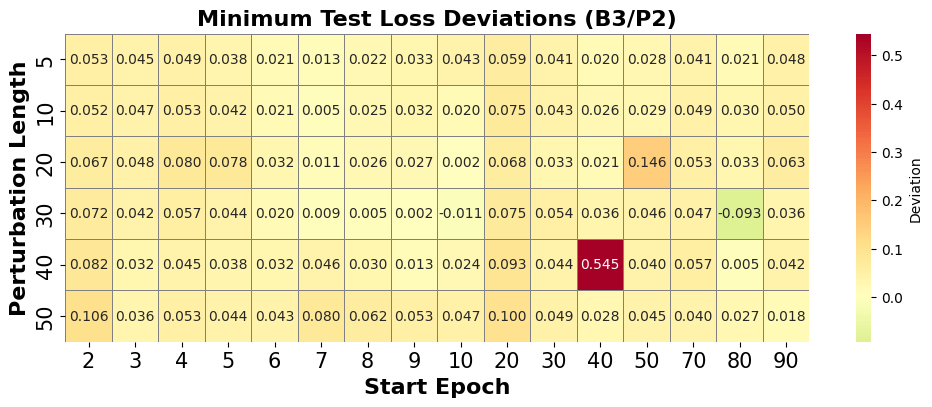

In [36]:
# show the deviation from baseline minimum test loss in a heatmap, with starting epoch on the x-axis and perturbation length on the y-axis
# the color of the cell shows the deviation from baseline minimum test loss
# the heatmap is sorted by starting epoch on the x-axis, then by perturbation length on the y-axis

import seaborn as sns

# Get minimum test loss from baseline run
baseline_min_test_loss = baseline_df['test_loss'].min()
baseline_min_epoch = baseline_df.loc[baseline_df['test_loss'].idxmin(), 'epoch']

# Collect minimum test loss deviations
deviation_data = []

for run_info in run_metadata:
    run_name = run_info['run_name']
    df = run_info['df']
    start_epoch = run_info['start_epoch']
    length = run_info['length']
    
    # Sort by epoch
    df_sorted = df.sort_values('epoch')
    
    if len(df_sorted) == 0:
        continue
    
    # Get minimum test loss value reached in this run
    min_test_loss = df_sorted['test_loss'].min()
    min_test_loss_epoch = df_sorted.loc[df_sorted['test_loss'].idxmin(), 'epoch']
    
    # Calculate deviation from baseline minimum
    # (positive = worse than baseline, negative = better)
    deviation = min_test_loss - baseline_min_test_loss

    deviation_data.append({
        'start_epoch': start_epoch,
        'length': length,
        'deviation': deviation,
        'min_test_loss': min_test_loss,
        'min_test_loss_epoch': min_test_loss_epoch,
        'baseline_min_test_loss': baseline_min_test_loss
    })

# Convert to DataFrame
deviation_df = pd.DataFrame(deviation_data)

# Exclude any rows you want to exclude
deviation_df = deviation_df[deviation_df['start_epoch'] != 13]
deviation_df = deviation_df[deviation_df['start_epoch'] != 16]
deviation_df = deviation_df[deviation_df['start_epoch'] != 19]
deviation_df = deviation_df[deviation_df['start_epoch'] != 22]
deviation_df = deviation_df[deviation_df['start_epoch'] != 60]
deviation_df = deviation_df[deviation_df['start_epoch'] != 58]
deviation_df = deviation_df[deviation_df['start_epoch'] != 94]

# Create pivot table for heatmap: rows (y-axis) = length, columns (x-axis) = start_epoch
heatmap_data = deviation_df.pivot_table(
    values='deviation',
    index='length',
    columns='start_epoch',
    aggfunc='first'  # Should only be one value per combination, but use first to be safe
)

# Sort by start_epoch (columns) and length (rows)
heatmap_data = heatmap_data.sort_index(axis=0)  # Sort rows (length)
heatmap_data = heatmap_data.sort_index(axis=1)  # Sort columns (start_epoch)

# Create the heatmap with smaller figure size
plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.3f', 
    cmap='RdYlGn_r',  # Reversed Red-Yellow-Green colormap (green=better/lower, red=worse/higher)
    center=0,  # Center colormap at 0 (no deviation)
    cbar_kws={'label': 'Deviation'},
    linewidths=0.5,
    linecolor='gray'
)
ax.set_xlabel('Start Epoch', fontsize=16, fontweight='bold')
ax.set_ylabel('Perturbation Length', fontsize=16, fontweight='bold')
ax.set_title('Minimum Test Loss Deviations (B3/P2)', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Print summary statistics
print(f"\nSummary Statistics:")
print(f"  Baseline minimum test loss (epoch {baseline_min_epoch}): {baseline_min_test_loss:.4f}")
print(f"  Total runs: {len(deviation_df)}")
print(f"  Mean deviation: {deviation_df['deviation'].mean():.4f}")
print(f"  Standard deviation: {deviation_df['deviation'].std():.4f}")
print(f"  Min deviation: {deviation_df['deviation'].min():.4f}")
print(f"  Max deviation: {deviation_df['deviation'].max():.4f}")
print(f"  Runs better than baseline minimum (negative deviation): {len(deviation_df[deviation_df['deviation'] < 0])}")
print(f"  Runs worse than baseline minimum (positive deviation): {len(deviation_df[deviation_df['deviation'] > 0])}")